this notebook does some spot checking on learned weight patterns in `scripts/training/yuanyuan_8k_a_3day/feature_approximation/local_pcn_recurrent/submit_sep2.py`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from thesis_v2 import dir_dict
from thesis_v2.training.training_aux import load_training_results

In [3]:
from sys import path
from os.path import join, exists, dirname
from os import makedirs



In [4]:
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
    explored_models_20200218 as param_iterator_obj,
    keygen
)

In [5]:
from numpy.linalg import norm
import numpy as np

In [6]:
from pickle import load

In [7]:
def load_one_result(filename):
    with open(filename, 'rb') as f:
        return load(f)

In [8]:
# create dir
global_vars = {
    'save_dir': join(dir_dict['analyses'],
                     'scripts+yuanyuan_8k_a_3day+maskcnn_polished_with_rcnn_k_bl+20200218',
                    'pca')
}

In [9]:
from math import sqrt
from torchvision.utils import make_grid
from torch import tensor

In [10]:
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(
    ('042318', '043018','051018',))
                           )
assert cc_max_all_neurons.shape == (79,)

In [11]:
def do_analysis(label_fname_list):
    for label, fname in label_fname_list:
        print(label)
        data = load_one_result(fname)
#         for x, y in data.items():
#             print(x, y.dtype, y.shape)
            
        
        # ok. what to show here?
        # first, let's reshape `components`.
        components = data['components']
        assert components.ndim == 2
        n_el_per_filter = components.shape[1]
        kernel_size = round(sqrt(n_el_per_filter))
        assert type(kernel_size) is int and kernel_size**2 == n_el_per_filter
        components = components.reshape(components.shape[0], 1, kernel_size, kernel_size)
        
        # this components is ready to be displayed using pytorch's util
        components_grid = make_grid(tensor(components[:20]), nrow=10,normalize=True, scale_each=True)
        components_grid = components_grid.numpy().transpose(1, 2, 0)
        print(np.cumsum(data['explained_variance_ratio'])[:20])
        plt.close('all')
        plt.figure(figsize=(8,6))
        plt.imshow(components_grid,vmin=0.0,vmax=1.0,interpolation='none')
        plt.show()
        

In [12]:
def collect_all(cls_set):
    save_dir = global_vars['save_dir']
    count = 0
    
    for idx, param in enumerate(param_iterator_obj().generate()):
        if param['num_layer'] != 3:
            continue
        
        if param['rcnn_bl_cls'] not in cls_set:
            # ignore cls=1,2 models.
            continue
            
        if param['kernel_size_l23'] in {3,5}:
            # too small.
            continue
    
    
        
        key = keygen(**{k: v for k, v in param.items() if k not in {'scale', 'smoothness'}})
        result = load_training_results(key, return_model=False, return_checkpoint=True)
        cc_raw = np.asarray(result['stats_best']['stats']['test']['corr'])
        assert cc_raw.shape == (79,)
        # load loss curve to make sure we are good in approximation.
        corr_test = ((cc_raw/cc_max_all_neurons)**2).mean()
        # only keep 0.6+ models
        if corr_test < 0.62:
            continue
        
        count += 1
        
        
        def filename_gen(x):
            return join(save_dir, f'{idx}/unit_norm', f'{x}.pkl')
        
        filename_set = {'ff', 'lateral'}
        if not all([exists(filename_gen(x)) for x in filename_set]):
            # right now if partially done, the partial results will be fully overwritten.
            continue
            raise RuntimeError('bug!')
        
        # show some results.
        verbose = count % 5 == 0
        
        if verbose:
            print(count, key, corr_test)
            
            # load lateral one
            do_analysis([(x, filename_gen(x)) for x in [
                'lateral','ff',
                # remove this, confusing.
#                 'all'
            ]
                        ])
        
        
    print(count)


5 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lmse/m_se0 0.6454811369224269
lateral
[0.23791585 0.3888223  0.50508744 0.5985737  0.66653015 0.71626501
 0.74834041 0.77676901 0.80137017 0.81621591 0.83091474 0.84403659
 0.85699691 0.86656289 0.87394065 0.88105723 0.88777066 0.89371136
 0.8994886  0.90453594]


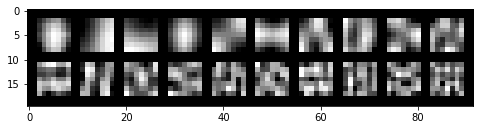

ff
[0.11844795 0.22179612 0.31198102 0.39761879 0.45743542 0.50977486
 0.5535681  0.59540815 0.62993947 0.66368953 0.69128104 0.71457354
 0.73694814 0.75647207 0.77348581 0.78869669 0.8024273  0.81424625
 0.82566123 0.83673035]


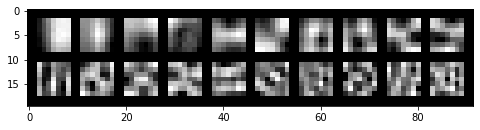

10 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l239/sc0.01/sm0.000005/lmse/m_se0 0.6224996678337649
lateral
[0.17048091 0.2905491  0.38925819 0.47865114 0.55164561 0.61490308
 0.66193868 0.70390593 0.73909349 0.76489716 0.78809294 0.80931772
 0.82849385 0.84207631 0.85510588 0.86678195 0.87737338 0.88664023
 0.89539588 0.90254978]


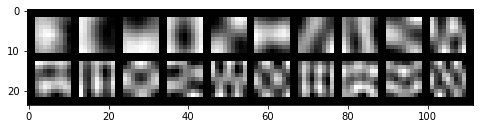

ff
[0.10710821 0.19995479 0.28993601 0.34728307 0.39992104 0.44997533
 0.49577811 0.53270259 0.56721072 0.59791625 0.62452856 0.64925992
 0.67329457 0.69299688 0.71214077 0.72938477 0.74573501 0.76071199
 0.7755002  0.78956964]


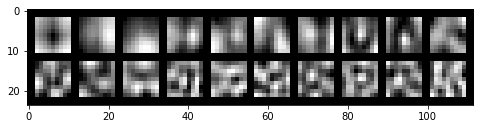

15 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.625962377469616
lateral
[0.1992381  0.33500339 0.45511185 0.54635012 0.61479363 0.67106021
 0.71800967 0.75238619 0.77932497 0.80419489 0.82628464 0.84499102
 0.86145641 0.87591029 0.88731259 0.89763994 0.90676103 0.91542008
 0.92338954 0.92981665]


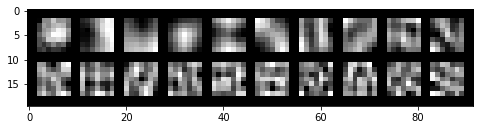

ff
[0.15812503 0.27782756 0.38031589 0.46304266 0.53023867 0.5835352
 0.63407128 0.67515153 0.71420701 0.74581307 0.77072996 0.79452093
 0.81753863 0.83842331 0.85420588 0.86842089 0.88097625 0.89206103
 0.90293126 0.91186065]


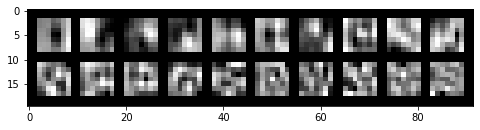

20 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.6452905531995794
lateral
[0.20800018 0.34761971 0.46725141 0.56309309 0.63244669 0.69537924
 0.734762   0.77319279 0.80344003 0.82464803 0.84383318 0.86090393
 0.8751771  0.88778289 0.89731459 0.9058205  0.91405601 0.922056
 0.9291141  0.93476894]


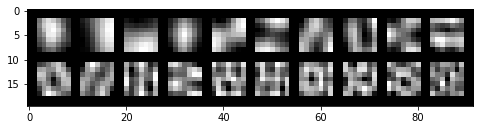

ff
[0.15479498 0.29688749 0.40385381 0.49981095 0.56307675 0.61671195
 0.65983671 0.69823749 0.728911   0.75573557 0.77920205 0.79939875
 0.81859337 0.83312983 0.84528205 0.85708156 0.86833746 0.87758779
 0.88622893 0.89357254]


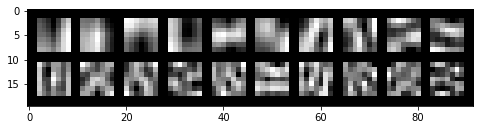

25 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.6418870724479459
lateral
[0.27873916 0.43016767 0.529678   0.61371294 0.67964929 0.72653227
 0.76902104 0.7979869  0.82305    0.84750249 0.86854643 0.88614745
 0.89800181 0.90780129 0.91688213 0.92438441 0.93043581 0.93625037
 0.9416284  0.94672265]


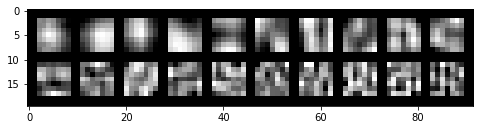

ff
[0.19573064 0.2984136  0.37436567 0.4398291  0.50047941 0.55083538
 0.59019096 0.62774733 0.65838711 0.68675646 0.71264196 0.7371786
 0.75910303 0.77957043 0.79836719 0.81536428 0.83136418 0.84578701
 0.85829618 0.87021512]


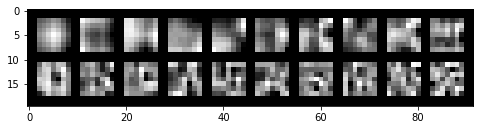

30 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.6439962274853087
lateral
[0.26286075 0.40329137 0.53258863 0.64200606 0.7024241  0.75237166
 0.78218878 0.81020722 0.83137427 0.84928072 0.8662247  0.87811949
 0.88985586 0.89791996 0.90461908 0.9107443  0.91626466 0.92138422
 0.92607853 0.9305462 ]


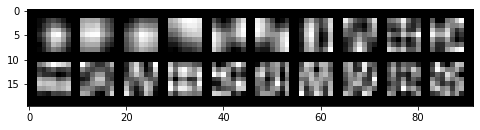

ff
[0.16674119 0.27168626 0.37021529 0.45205135 0.51504388 0.57123268
 0.61271375 0.65025442 0.67999744 0.70562778 0.73054846 0.74944319
 0.76773544 0.78337303 0.79760582 0.81155056 0.82304676 0.83356948
 0.84369145 0.85254173]


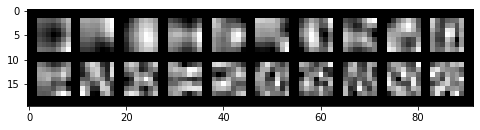

35 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lmse/m_se1 0.6274580061342602
lateral
[0.21260734 0.35261623 0.47036731 0.5857693  0.65814288 0.71917817
 0.75928747 0.78688609 0.81000821 0.82952582 0.84816928 0.86324672
 0.87510347 0.88548036 0.89424278 0.90207237 0.90931726 0.91589097
 0.92235121 0.92794635]


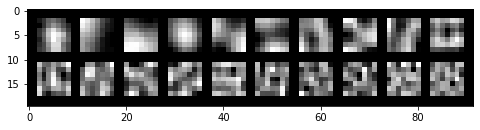

ff
[0.12665655 0.22812614 0.31410865 0.37966495 0.44247326 0.49698945
 0.54122561 0.58168038 0.61953429 0.65077014 0.68058834 0.71009066
 0.7356828  0.75973904 0.78133678 0.80231012 0.82131701 0.83601923
 0.84985682 0.86133971]


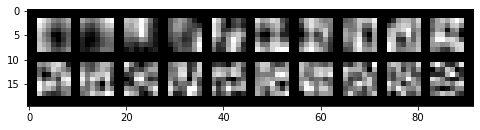

40 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lmse/m_se1 0.648784630286239
lateral
[0.23359679 0.37742885 0.49177858 0.5839631  0.64885026 0.70794593
 0.74636477 0.78262787 0.8061413  0.82427666 0.84107461 0.85698706
 0.8710506  0.88153421 0.88989593 0.89705961 0.90384833 0.91012367
 0.91590706 0.92102566]


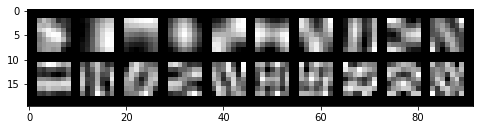

ff
[0.12428236 0.2363639  0.3287958  0.40678371 0.46634764 0.52194766
 0.56892587 0.60757188 0.64259374 0.67404924 0.70060125 0.72519919
 0.74846887 0.76815686 0.78671293 0.80421309 0.81917548 0.83337667
 0.84668574 0.85652224]


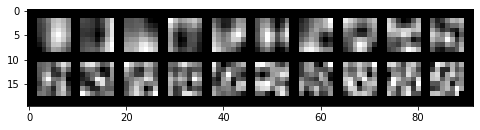

45 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6251191410698792
lateral
[0.28403736 0.42849509 0.54091487 0.6277606  0.6830655  0.73483434
 0.77396286 0.79993559 0.8231684  0.84231296 0.85874995 0.87177448
 0.88294828 0.89242398 0.90118889 0.90867534 0.91515124 0.92089042
 0.92616443 0.93132529]


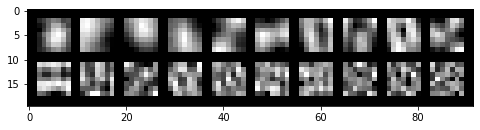

ff
[0.16353348 0.30108584 0.399707   0.48942256 0.56248386 0.6206658
 0.67122583 0.70707089 0.73812189 0.76804734 0.79187011 0.81073827
 0.82828788 0.84491822 0.8581038  0.8703223  0.88179927 0.8915132
 0.90074351 0.90935326]


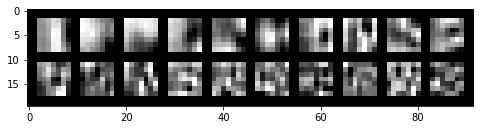

50 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6347934124667878
lateral
[0.30246073 0.45899874 0.57267889 0.66629498 0.72425757 0.77636118
 0.80514093 0.82927448 0.84972934 0.86308466 0.87539125 0.88696929
 0.89729516 0.90497192 0.911175   0.91718157 0.92234449 0.92680314
 0.93114348 0.93509214]


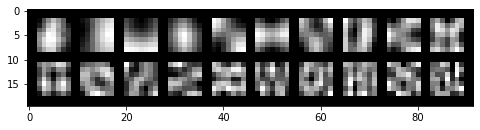

ff
[0.1903623  0.30928784 0.41145904 0.50342266 0.56093963 0.61388349
 0.65908219 0.69785931 0.72705094 0.75507908 0.7803519  0.80126599
 0.81914086 0.8342125  0.84811027 0.86039578 0.87140941 0.88119276
 0.88948497 0.89757021]


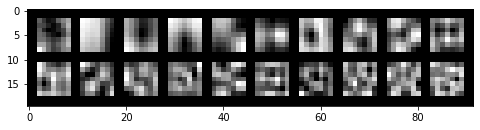

55 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l239/sc0.01/sm0.000005/lpoisson/m_se1 0.6321071773664905
lateral
[0.21087099 0.34243789 0.45321683 0.5463234  0.61305415 0.67383932
 0.71277731 0.74901459 0.77808066 0.79990874 0.81985545 0.83809583
 0.85382157 0.86563855 0.87498069 0.88362713 0.89158067 0.8991359
 0.90587047 0.91155982]


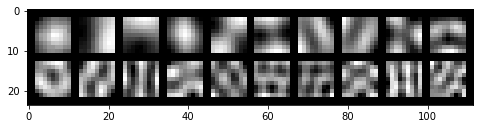

ff
[0.1335639  0.25890167 0.35972486 0.43671434 0.48785481 0.53414067
 0.57648609 0.61174425 0.6404072  0.66770759 0.69359021 0.71654964
 0.73624942 0.75420892 0.77043273 0.78529427 0.79876842 0.81116733
 0.8229713  0.83361403]


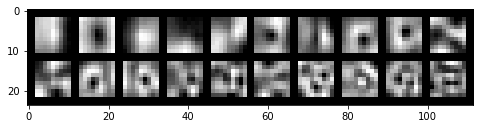

60 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6277969883942877
lateral
[0.28074952 0.42441637 0.53565289 0.64158333 0.70391943 0.74931623
 0.7828433  0.81078906 0.83589401 0.85520432 0.87210205 0.88492282
 0.89634579 0.90619881 0.91505128 0.92200352 0.9284658  0.93376205
 0.93822036 0.94259055]


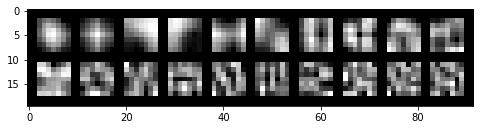

ff
[0.17734721 0.2817795  0.36694738 0.44192333 0.50078486 0.55658329
 0.60900366 0.64815743 0.6843378  0.7154063  0.73881244 0.76143232
 0.78105913 0.79916943 0.81668762 0.8312173  0.84514502 0.85898634
 0.87062948 0.88072561]


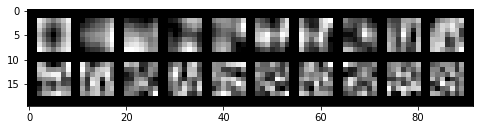

65 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6298183452475108
lateral
[0.28272856 0.42671401 0.56766076 0.6587803  0.71703421 0.76311563
 0.79438532 0.81762258 0.83664017 0.85246642 0.86595537 0.87634142
 0.88484816 0.8921645  0.89828274 0.90394951 0.90903933 0.91395286
 0.91845146 0.92260064]


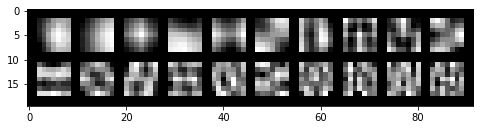

ff
[0.16530975 0.29052184 0.40957521 0.50629412 0.56841754 0.6244776
 0.67640973 0.70866896 0.73877369 0.76299594 0.78425661 0.80334938
 0.81870452 0.83170901 0.84335555 0.85388195 0.86322743 0.87152433
 0.87915109 0.88598662]


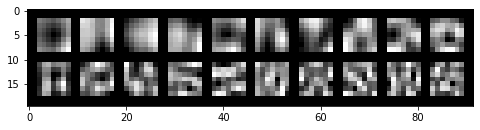

70 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l239/sc0.01/sm0.000005/lpoisson/m_se1 0.6261815634250865
lateral
[0.26254915 0.39993756 0.51668703 0.60607961 0.66879853 0.71585082
 0.75265465 0.78373474 0.81029373 0.83228012 0.84891624 0.86281044
 0.8758997  0.88572518 0.89351307 0.90096748 0.90754899 0.91388895
 0.91873114 0.92313231]


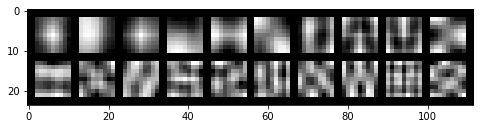

ff
[0.20110101 0.30913073 0.40318632 0.48159319 0.53530517 0.58679694
 0.62860215 0.65661159 0.68330075 0.70893546 0.73029454 0.74909818
 0.76721386 0.78211147 0.79503981 0.80723732 0.81724776 0.82664602
 0.83564863 0.84387087]


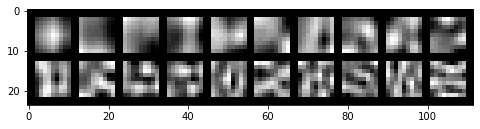

70


In [13]:
collect_all({3,4})